In [1]:
import pandas as pd
import plotly.graph_objs as go 
import plotly.offline as py 

In [2]:
df = pd.read_excel(r'C:\Portfolio\datasets\Dados_Comerciais.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID_Produto            457 non-null    object        
 1   Produto               457 non-null    object        
 2   Categoria             457 non-null    object        
 3   Segmento              457 non-null    object        
 4   Fabricante            457 non-null    object        
 5   ID_Loja               457 non-null    object        
 6   Cidade                457 non-null    object        
 7   Estado                457 non-null    object        
 8   Vendedor              457 non-null    object        
 9   ID_Vendedor           457 non-null    int64         
 10  Comissão(Percentual)  457 non-null    int64         
 11  Data_Venda            457 non-null    datetime64[ns]
 12  Valor_Venda           457 non-null    float64       
 13  Custo               

In [4]:
df.head()

,ID_Produto,Produto,Categoria,Segmento,Fabricante,ID_Loja,Cidade,Estado,Vendedor,ID_Vendedor,Comissão(Percentual),Data_Venda,Valor_Venda,Custo
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2,2012-10-04,679.00,345
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,3,2012-01-01,832.00,712
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2,2012-02-02,790.00,390
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,3,2012-03-03,765.32,200
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,5,2012-04-04,459.89,234


In [7]:
# Criando colunas com os anos e meses das vendas para uma análise mais detalhada
df['Ano_Venda'] = df['Data_Venda'].dt.year
df['Mes_venda'] = df['Data_Venda'].dt.month
df.head()

,ID_Produto,Produto,Categoria,Segmento,Fabricante,ID_Loja,Cidade,Estado,Vendedor,ID_Vendedor,Comissão(Percentual),Data_Venda,Valor_Venda,Custo,Ano_Venda,Mes_venda
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2,2012-10-04,679.00,345,2012,10
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,3,2012-01-01,832.00,712,2012,1
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2,2012-02-02,790.00,390,2012,2
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,3,2012-03-03,765.32,200,2012,3
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,5,2012-04-04,459.89,234,2012,4


In [8]:
# Groupby para agrupar vendas por Estado
vendas_por_estado = df.groupby('Estado')['Valor_Venda'].sum().reset_index()
vendas_por_estado

,Estado,Valor_Venda
0,Bahia,2940.00
1,Espírito Santo,24803.77
2,Minas Gerais,38298.87
3,Paraná,2265.90
4,Rio de Janeiro,107296.01
5,São Paulo,183704.56


In [10]:
# estado com maior faturamento
estado_maior_fat = vendas_por_estado.loc[vendas_por_estado['Valor_Venda'].idxmax()]
estado_maior_fat

Estado         São Paulo
Valor_Venda    183704.56
Name: 5, dtype: object

In [11]:
# Filtrando os dados para o estado de São Paulo
df_sp = df[df['Estado'] == estado_maior_fat['Estado']]

In [12]:
# Agrupando os dados por ano e calculando o valor total das vendas
vendas_ano_sp = df_sp.groupby('Ano_Venda')['Valor_Venda'].sum().reset_index()

In [13]:
# Preparando os dados para o gráfico que representa o faturamento anual no estado com maior faturamento (São Paulo)
anos_sp = vendas_ano_sp['Ano_Venda'].astype(str)  # Convertendo para string para ser tratado como categoria
valores_venda_sp = vendas_ano_sp['Valor_Venda']

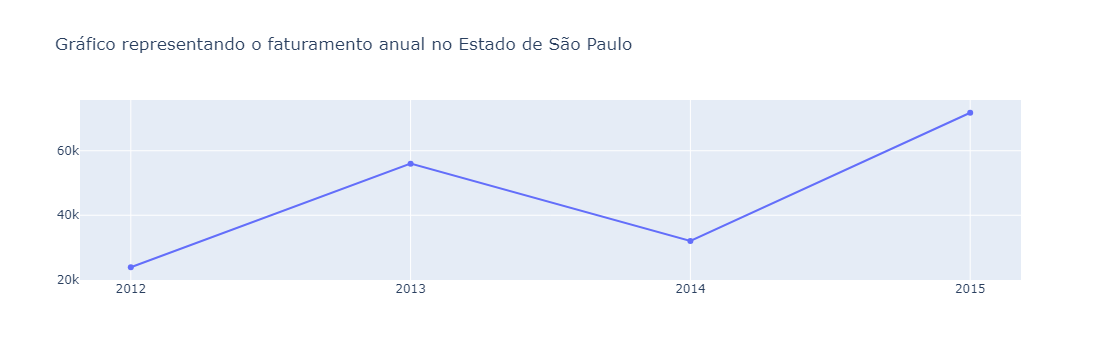

In [40]:
# Gráfico que representa o faturamento anual do estado de São Paulo
line1 = go.Scatter(x = anos_sp, y = valores_venda_sp, mode = 'lines+markers', name = 'Vendas por Ano') # mode = linhas + pontos

layout = go.Layout(
    title = 'Gráfico representando o faturamento anual no Estado de São Paulo',
    xaxis = {'type': 'category'}  # Definindo o tipo do eixo X como categoria
)

fig = go.Figure(data = [line1], layout = layout)

# Exibindo o gráfico
py.iplot(fig)

In [15]:
# Descobrindo o estado com o menor faturamento para comparar com as vendas do estado de maior faturamento
estado_menor_fat = vendas_por_estado.loc[vendas_por_estado['Valor_Venda'].idxmin()]
estado_menor_fat

Estado         Paraná
Valor_Venda    2265.9
Name: 3, dtype: object

In [17]:
# Filtrando os dados do estado com menor faturamento (Paraná)
df_pr = df[df['Estado'] == estado_menor_fat['Estado']]

In [18]:
# Groupby para agrupar os dados por ano e calculando o valor total das vendas de cada ano 
vendas_ano_pr = df_pr.groupby('Ano_Venda')['Valor_Venda'].sum().reset_index()

In [19]:
#Preparação dos dados para o gráfico 
anos_pr = vendas_ano_pr['Ano_Venda'].astype(str) # Convertendo para string para ser tratado como categoria
valores_venda_pr = vendas_ano_pr['Valor_Venda']

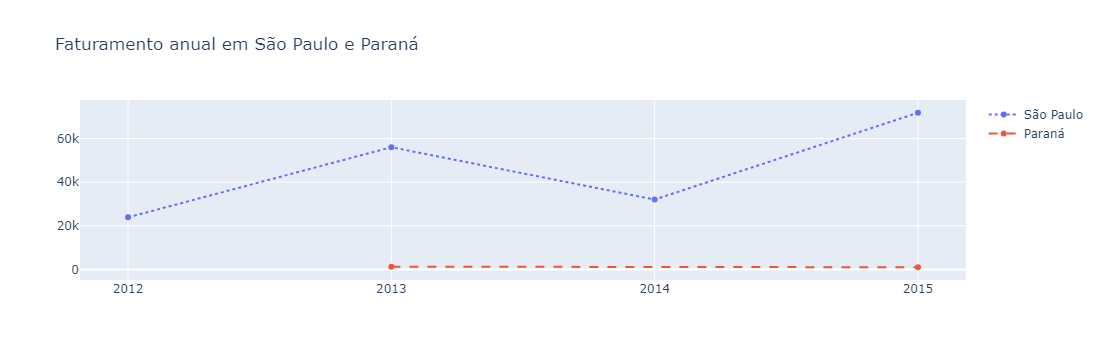

In [39]:
# Gráfico que compara as vendas dos estados com maior e menor faturamento
line1 = go.Scatter(x = anos_sp, y = valores_venda_sp, mode = 'lines+markers', name = 'São Paulo', line=dict(dash='dot')) # pontilhado
line2 = go.Scatter(x = anos_pr, y = valores_venda_pr, mode = 'lines+markers', name = 'Paraná', line=dict(dash='dash')) # tracejado

layout = go.Layout(
    title = 'Faturamento anual em São Paulo e Paraná',
    xaxis = {'type': 'category'} # Definindo eixo x como categoria
)
    
fig = go.Figure(data = [line1, line2], layout = layout)

# Exibindo o gráfico
py.iplot(fig)  

In [24]:
# Filtrando os dados do Paraná para entender o motivo de não ter vendas no ano de 2014
vendas_parana = df[(df['Estado'] == 'Paraná')]

qtd_vendas_pr = vendas_parana.shape[0]
valor_vendas_pr = vendas_parana['Valor_Venda'].sum()

print("Quantidade de vendas no Estado do Paraná:", qtd_vendas_pr)
print("Valor de vendas no Estado do Paraná:", valor_vendas_pr)

Quantidade de vendas no Estado do Paraná: 7
Valor de vendas no Estado do Paraná: 2265.9


In [25]:
# Filtrando dados do estado do Paraná com colunas específicas
vendas_parana = df.loc[df['Estado'] == 'Paraná', ['ID_Loja', 'Cidade', 'Estado', 'ID_Vendedor', 'Valor_Venda', 'Ano_Venda']]
vendas_parana

,ID_Loja,Cidade,Estado,ID_Vendedor,Valor_Venda,Ano_Venda
87,P0761,Cascavel,Paraná,1004,297.0,2013
89,P0761,Cascavel,Paraná,1006,167.0,2013
128,P0761,Cascavel,Paraná,1006,799.9,2013
240,P0761,Cascavel,Paraná,1006,290.0,2015
242,P0761,Cascavel,Paraná,1003,455.0,2015
278,P0761,Cascavel,Paraná,1004,123.0,2015
281,P0761,Cascavel,Paraná,1005,134.0,2015


In [41]:
# Filtrando os dados para os estados de maior e menor faturamento
df_estado_maior = df[df['Estado'] == estado_maior_fat['Estado']]
df_estado_menor = df[df['Estado'] == estado_menor_fat['Estado']]

In [50]:
df_estado_maior.head()

,ID_Produto,Produto,Categoria,Segmento,Fabricante,ID_Loja,Cidade,Estado,Vendedor,ID_Vendedor,Comissão(Percentual),Data_Venda,Valor_Venda,Custo,Ano_Venda,Mes_venda
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2,2012-10-04,679.00,345,2012,10
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,3,2012-01-01,832.00,712,2012,1
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2,2012-02-02,790.00,390,2012,2
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,3,2012-03-03,765.32,200,2012,3
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,5,2012-04-04,459.89,234,2012,4


In [52]:
df_estado_menor.head()

,ID_Produto,Produto,Categoria,Segmento,Fabricante,ID_Loja,Cidade,Estado,Vendedor,ID_Vendedor,Comissão(Percentual),Data_Venda,Valor_Venda,Custo,Ano_Venda,Mes_venda
87,SKU-0000088,Fritadeira,Eletroportáteis,Doméstico,Samsung,P0761,Cascavel,Paraná,Artur Moreira,1004,2,2013-01-02,297.0,120,2013,1
89,SKU-0000090,Aspirador,Eletroportáteis,Doméstico,Britânia,P0761,Cascavel,Paraná,Josias Silva,1006,2,2013-03-02,167.0,120,2013,3
128,SKU-0000129,Secadora Vapor,Eletrodomésticos,Doméstico,Brastemp,P0761,Cascavel,Paraná,Josias Silva,1006,2,2013-06-02,799.9,120,2013,6
240,SKU-0000241,Micro-Ondas,Eletrodomésticos,Doméstico,Consul,P0761,Cascavel,Paraná,Josias Silva,1006,2,2015-01-02,290.0,120,2015,1
242,SKU-0000243,Ar Condicionado,Eletrodomésticos,Industrial,Samsung,P0761,Cascavel,Paraná,Mateus Gonçalves,1003,2,2015-03-02,455.0,120,2015,3


In [57]:
# Agrupando a quantidade de vendas por categoria usando o groupby
qtd_vendas_cat_maior = df_estado_maior.groupby('Categoria').size().reset_index(name='Qtd_Vendas') # size para contar o número de vendas pra cada categoria
qtd_vendas_cat_menor = df_estado_menor.groupby('Categoria').size().reset_index(name='Qtd_Vendas')

In [60]:
qtd_vendas_cat_maior

,Categoria,Qtd_Vendas
0,Celulares,18
1,Eletrodomésticos,102
2,Eletroportáteis,55
3,Eletrônicos,39


In [61]:
qtd_vendas_cat_menor

,Categoria,Qtd_Vendas
0,Eletrodomésticos,3
1,Eletroportáteis,4


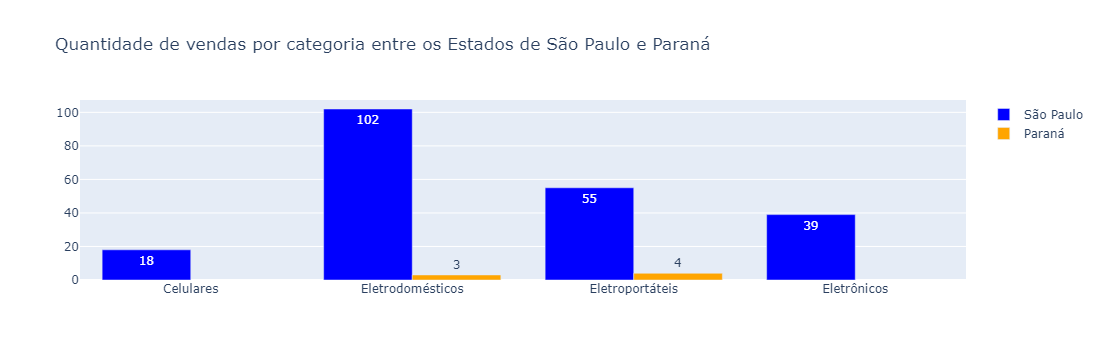

In [78]:
# Preparando os dados para os gráficos
barra_maior = go.Bar(
    x=qtd_vendas_cat_maior['Categoria'],
    y=qtd_vendas_cat_maior['Qtd_Vendas'],
    name='São Paulo',
    marker={'color': 'blue'},
    text=qtd_vendas_cat_maior['Qtd_Vendas'],  # Adiciona a quantidade como texto
    textposition='inside'  # Posiciona o texto dentro da barra
)

barra_menor = go.Bar(
    x=qtd_vendas_cat_menor['Categoria'],
    y=qtd_vendas_cat_menor['Qtd_Vendas'],
    name='Paraná',
    marker={'color': 'orange'},
    text=qtd_vendas_cat_menor['Qtd_Vendas'],  # Adiciona a quantidade como texto
    textposition='outside' 
)

# Definindo o layout
layout = go.Layout(
    title="Quantidade de vendas por categoria entre os Estados de São Paulo e Paraná",
    barmode='group'
)

# Criando a figura
fig = go.Figure(data=[barra_maior, barra_menor], layout=layout)

# Exibindo o gráfico
py.iplot(fig)

In [26]:
# Ordenando os estados em ordem crescente pelo valor de vendas se selecionando os 3 estados com maior faturamento
top_3_estados = vendas_por_estado.nlargest(3, "Valor_Venda")
top_3_estados

,Estado,Valor_Venda
5,São Paulo,183704.56
4,Rio de Janeiro,107296.01
2,Minas Gerais,38298.87


In [27]:
# Filtrando os dados dos top 3 estados
df_top_1 = df[df['Estado'] == top_3_estados.iloc[0]['Estado']]
df_top_2 = df[df['Estado'] == top_3_estados.iloc[1]['Estado']]
df_top_3 = df[df['Estado'] == top_3_estados.iloc[2]['Estado']]

In [28]:
# Groupy para agrupar os dados por ano e calculando o valor total das vendas para cada estado
vendas_ano_top_1 = df_top_1.groupby('Ano_Venda')['Valor_Venda'].sum().reset_index()
vendas_ano_top_2 = df_top_2.groupby('Ano_Venda')['Valor_Venda'].sum().reset_index()
vendas_ano_top_3 = df_top_3.groupby('Ano_Venda')['Valor_Venda'].sum().reset_index()

In [75]:
# Preparando os dados para o gráfico
anos_top_1 = vendas_ano_top_1['Ano_Venda'].astype(str) # Convertendo para string para ser tratado como categoria
valores_venda_top_1 = vendas_ano_top_1['Valor_Venda']
anos_top_2 = vendas_ano_top_2['Ano_Venda'].astype(str) 
valores_venda_top_2 = vendas_ano_top_2['Valor_Venda']
anos_top_3 = vendas_ano_top_3['Ano_Venda'].astype(str) 
valores_venda_top_3 = vendas_ano_top_3['Valor_Venda']

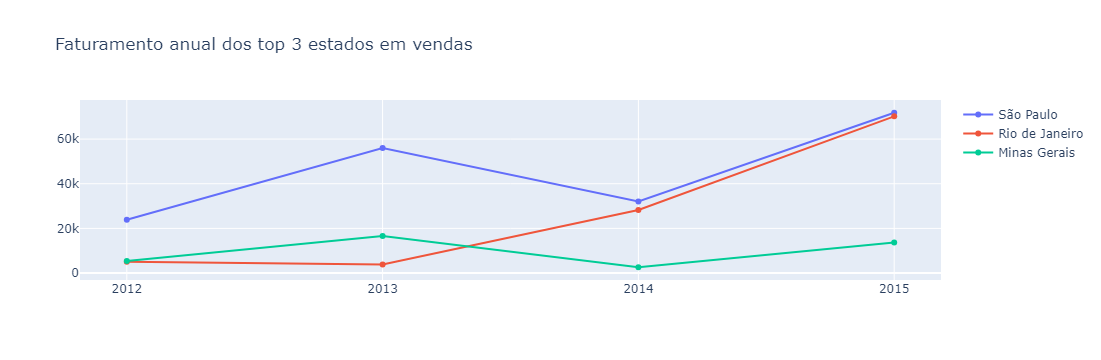

In [77]:
# Criando o gráfico de linhas com Plotly
line1 = go.Scatter(x=anos_top_1, y=valores_venda_top_1, mode='lines+markers', name=top_3_estados.iloc[0]['Estado'])
line2 = go.Scatter(x=anos_top_2, y=valores_venda_top_2, mode='lines+markers', name=top_3_estados.iloc[1]['Estado'])
line3 = go.Scatter(x=anos_top_3, y=valores_venda_top_3, mode='lines+markers', name=top_3_estados.iloc[2]['Estado'])

# Layout do gráfico (figuras e dados)
layout = go.Layout(
    title='Faturamento anual dos top 3 estados em vendas',
    xaxis={'type': 'category'}
)

fig = go.Figure(data=[line1, line2, line3], layout=layout)

# Exibindo o gráfico
py.iplot(fig)